# Θεωρία Πληροφορίας - 9ο Εξάμηνο

## 6η Σειρά Ασκήσεων 2023 - 2024

Ονοματεπώνυμο: Ειρήνη Δόντη

Α.Μ.: 03119839

### Άσκηση 1

1.

In [40]:
from math import log
from scipy.optimize import minimize, Bounds, LinearConstraint
import matplotlib.pyplot as plt

def calculate_entropy(probs):
    return -sum(i*log(i,2) for i in probs if i !=0)

def objective_function(probs):
    p_0 = probs[0]
    p_1 = probs[1]
    p_2 = probs[2]
    H_r1 = calculate_entropy([1, 0, 0])
    H_r2 = calculate_entropy([0, 1, 0])
    H_r3 = calculate_entropy([(1/2)*(1-q),(1/2)*(1-q), q])
    H_y = 0
    if (1*p_0 + 0*p_1 + (1/2)*(1-q)*p_2 != 0):
      H_y -=(1*p_0 + 0*p_1 + (1/2)*(1-q)*p_2) * log((1*p_0 + 0*p_1 + (1/2)*(1-q)*p_2),2)

    if (0*p_0 + 1*p_1 + (1/2)*(1-q)*p_2 != 0):
      H_y -=(0*p_0 + 1*p_1 + (1/2)*(1-q)*p_2) * log((0*p_0 + 1*p_1 + (1/2)*(1-q)*p_2),2)
    if (0*p_0 + 0*p_1 + q*p_2 != 0):
      H_y -=(0*p_0 + 0*p_1 + q*p_2)* log((0*p_0 + 0*p_1 + q*p_2),2)
    H_y_x = p_0* H_r1 + p_1 * H_r2 + p_2 * H_r3
    result = H_y - H_y_x
    return -result

In [41]:
x0 = [1/3, 1/3, 1/3]
bounds = Bounds([0,0,0], [1,1,1])
linear_constraint = LinearConstraint([[1,1,1]], [1], [1])

for q in [0, 1/2, 1]:
  res = minimize(objective_function, x0, constraints=[linear_constraint], bounds=bounds)
  print(f"Probability distribution is {res.x}")
  print(f"C = {-res.fun} for q =", q)

Probability distribution is [0.5 0.5 0. ]
C = 1.0 for q = 0
Probability distribution is [0.44099396 0.44099398 0.11801206]
C = 1.0874624077049773 for q = 0.5
Probability distribution is [0.33333333 0.33333333 0.33333333]
C = 1.584962500721156 for q = 1


2.

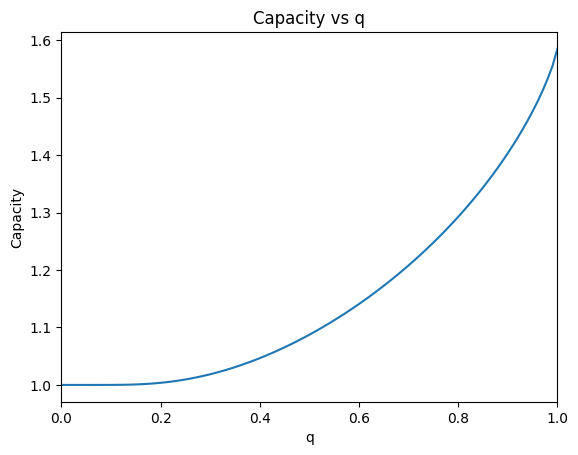

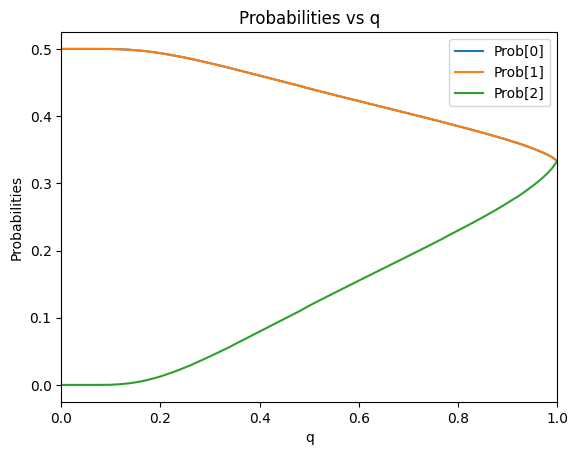

In [49]:
Capacities=[]
Prob = []
q_values = [i/100 for i in range(101)]
for q in q_values:
    res = minimize(objective_function, x0, constraints=[linear_constraint], bounds=bounds)
    Prob.append(res.x)
    Capacities.append(-res.fun)

plt.plot(q_values, Capacities)
plt.xlabel('q')
plt.ylabel('Capacity')
plt.title('Capacity vs q')
min_limit, max_limit = 0, 1
plt.xlim(min_limit, max_limit)
plt.show()

for i in range(len(Prob[0])):
    plt.plot(q_values, [prob[i] for prob in Prob], label=f'Prob[{i}]')

plt.xlabel('q')
plt.ylabel('Probabilities')
plt.title('Probabilities vs q')
plt.legend()
min_limit, max_limit = 0, 1
plt.xlim(min_limit, max_limit)
plt.show()


### Άσκηση 2

1.

In [ ]:
from math import log
from scipy.optimize import minimize, Bounds, LinearConstraint

def contains_zero(lst):
    return 0 in lst

def calculate_entropy(probs):
    return -sum(i*log(i,2) for i in probs)

def objective_function(probs):
    p_0 = probs[0]
    p_1 = probs[1]
    p_2 = probs[2]
    p_3 = probs[3]
    H_r1 = calculate_entropy([0.8, 0.1, 0.1])
    H_r2 = calculate_entropy([0.05, 0.85, 0.05, 0.05])
    H_r3 = calculate_entropy([0.08, 0.06, 0.8, 0.06])
    H_r4 = calculate_entropy([0.05, 0.05, 0.05, 0.85])
    H_y = - (0.8*p_0 + 0.05*p_1 + 0.08*p_2 + 0.05*p_3) * log((0.8*p_0 + 0.05*p_1 + 0.08*p_2 + 0.05*p_3),2) \
        - (0.1*p_0 + 0.85*p_1 + 0.06*p_2 + 0.05*p_3) * log((0.1*p_0 + 0.85*p_1 + 0.06*p_2 + 0.05*p_3),2) \
        - (0.1*p_0 + 0.05*p_1 + 0.8*p_2 + 0.05*p_3)* log((0.1*p_0 + 0.05*p_1 + 0.8*p_2 + 0.05*p_3),2) \
        - (0.0*p_0 + 0.05*p_1 + 0.06*p_2 + 0.85*p_3) * log((0.0*p_0 + 0.05*p_1 + 0.06*p_2 + 0.85*p_3),2)
    H_y_x = p_0* H_r1 + p_1 * H_r2 + p_2 * H_r3 + p_3 * H_r4
    result = H_y - H_y_x
    return -result

probs_y = [0.245, 0.265, 0.250, 0.240]
transition_matrix = [
    [0.8, 0.1, 0.1, 0.0],
    [0.05, 0.85, 0.05, 0.05],
    [0.08, 0.06, 0.8, 0.06],
    [0.05, 0.05, 0.05, 0.85]
]


H_y = calculate_entropy(probs_y)
print("H(Y) =",H_y)
H_y_x = 0
for i in transition_matrix:
  if not contains_zero(i):
      H_y_x += (1/4) * calculate_entropy(i)
print("H(Y|X) =", H_y_x)
mutual_info = round(H_y - H_y_x, 5)
print(f"I(X;Y) = {mutual_info}")

H(Y) = 1.9989983098904922
H(Y|X) = 0.6828218933568609
I(X;Y) = 1.31618


2.

In [ ]:
answer = round(2-calculate_entropy( [0.08, 0.06, 0.80, 0.06] ) , 5 )
print (f"Channel Capacity: { answer }")


Channel Capacity: 0.96388


4.

In [ ]:
x0 = [0.25, 0.25, 0.25, 0.25]
bounds = Bounds([0,0,0,0], [1,1,1,1])
linear_constraint = LinearConstraint([[1,1,1,1]], [1], [1])

res = minimize(objective_function, x0, constraints=[linear_constraint], bounds=bounds)
print(f"Probability distribution is {res.x}")
print(f"C = {-res.fun}")

Probability distribution is [0.25741439 0.24880208 0.2128828  0.28090073]
C = 1.089768438908867
